# WeatherPy
----

#### Analysis
* Latitude and Max Temperature have a fairly strong correlation. Moreso in the Northern Hemisphere than the Southern. This coorelation may be weaker since it is the end of summer in the Northern Hemisphere and temperatures are higher than usual in the more northern cities.
* Wind Speed, Humididty, and Cloudiness appear to have no coorelation to latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
query_url = f'{url}appid={weather_api_key}&units={units}&q='

city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

counts = 1
sets = 1

print('Beginning Data Retrieval')
print('----------------------------------')
for city in cities:
    print(f'Processing Record {counts} of set {sets} | {city}')
    try:
        response = requests.get(query_url + city).json()
        city_list.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        counts += 1
    except:
        print('City not found. Skipping...')
    if counts == 50:
        sets += 1
        counts = 1
        time.sleep(60)
print('----------------------------------')
print('Data Retrieval Complete')
print('----------------------------------')






Beginning Data Retrieval
----------------------------------
Processing Record 1 of set 1 | chokurdakh
Processing Record 2 of set 1 | hilo
Processing Record 3 of set 1 | willmar
Processing Record 4 of set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of set 1 | umzimvubu
City not found. Skipping...
Processing Record 4 of set 1 | tuktoyaktuk
Processing Record 5 of set 1 | cardonal
Processing Record 6 of set 1 | busselton
Processing Record 7 of set 1 | georgetown
Processing Record 8 of set 1 | airai
Processing Record 9 of set 1 | kupang
Processing Record 10 of set 1 | punta arenas
Processing Record 11 of set 1 | vegreville
Processing Record 12 of set 1 | mahebourg
Processing Record 13 of set 1 | saldanha
Processing Record 14 of set 1 | kuyanovo
Processing Record 15 of set 1 | lavrentiya
Processing Record 16 of set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of set 1 | jardim
Processing Record 17 of set 1 | huazolotitlan
City not found. Skipping

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
weather = {'City':city_list,'Lat':lat,'Lng':lng,'Max Temp':max_temp,'Humidity':humidity,'Cloudiness':cloudiness,'Wind Speed':wind_speed,'Country':country,'Date':date}
weather_df = pd.DataFrame({ key:pd.Series(value) for key, value in weather.items() })
weather_df = weather_df.dropna()
weather_df.to_csv('weather.csv',encoding='utf-8',index=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.9167,0.73,87.0,100.0,5.88,RU,1.631121e+09
1,hilo,19.7297,-155.0900,24.23,75.0,90.0,3.09,US,1.631121e+09
2,willmar,45.1219,-95.0433,22.01,49.0,1.0,6.69,US,1.631121e+09
3,attawapiskat,69.4541,-133.0374,8.36,72.0,51.0,4.48,CA,1.631121e+09
4,umzimvubu,20.6000,-99.1333,20.78,49.0,93.0,1.76,MX,1.631121e+09


In [25]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.918606,17.310191,20.307646,67.858407,53.357522,3.672177,1.631121e+09
std,33.312869,91.744008,9.140316,21.498007,37.777244,2.445367,2.627019e+02
min,-54.800000,-179.166700,-7.020000,7.000000,0.000000,0.000000,1.631121e+09
25%,-7.100000,-65.411700,13.470000,54.000000,13.000000,1.810000,1.631121e+09
50%,22.961400,23.433300,22.100000,73.000000,65.000000,3.240000,1.631121e+09
75%,46.716200,100.335400,26.750000,85.000000,90.000000,5.140000,1.631122e+09
max,78.218600,178.416700,45.400000,100.000000,100.000000,15.430000,1.631122e+09


The max of Humidity is 100, so no need to find humidity outliers


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

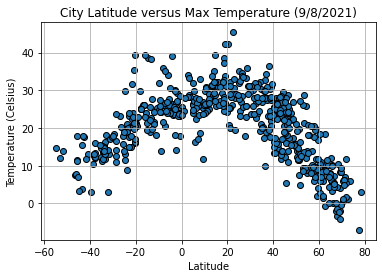

In [28]:
#Building the scatter plots
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], marker='o',edgecolors='black')
plt.title('City Latitude versus Max Temperature (9/8/2021)')
plt.ylabel('Temperature (Celsius)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('TempvLat.png')
plt.show()

## Latitude vs. Humidity Plot

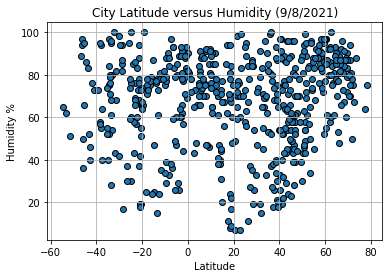

In [29]:
#Building the scatter plots
plt.scatter(weather_df['Lat'],weather_df['Humidity'], marker='o',edgecolors='black')
plt.title('City Latitude versus Humidity (9/8/2021)')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('HumidityvLat.png')
plt.show()


## Latitude vs. Cloudiness Plot

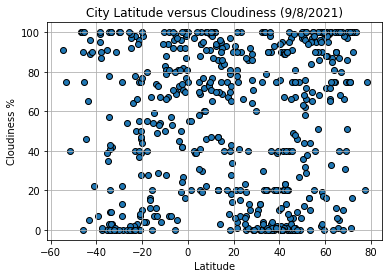

In [30]:
#Building the scatter plots
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], marker='o',edgecolors='black')
plt.title('City Latitude versus Cloudiness (9/8/2021)')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('CloudvLat.png')
plt.show()

## Latitude vs. Wind Speed Plot

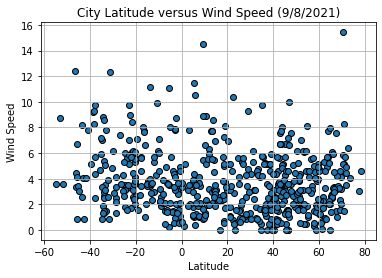

In [31]:
#Building the scatter plots
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], marker='o',edgecolors='black')
plt.title('City Latitude versus Wind Speed (9/8/2021)')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('WindvLat.png')
plt.show()

## Linear Regression

In [34]:
northern_df = weather_df.loc[weather_df['Lat'] >= 0]
southern_df = weather_df.loc[weather_df['Lat'] < 0]
northern_df.head()
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,tuktoyaktuk,-33.6500,115.3333,11.72,95.0,100.0,3.49,AU,1.631121e+09
7,busselton,-8.9266,125.4092,14.01,89.0,67.0,1.88,TL,1.631121e+09
8,georgetown,-10.1667,123.5833,25.07,75.0,83.0,6.16,ID,1.631121e+09
9,airai,-53.1500,-70.9167,12.06,62.0,75.0,8.75,CL,1.631121e+09
11,punta arenas,-20.4081,57.7000,21.25,67.0,28.0,5.61,MU,1.631121e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6002424742095565


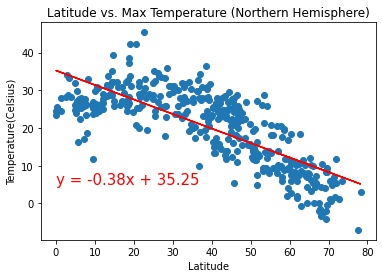

In [37]:
x = northern_df['Lat']
y = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values, 'r-')
plt.annotate(line_eq,(0,5),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature(Celsius)')
plt.title('Latitude vs. Max Temperature (Northern Hemisphere)')
print(f'The r-squared is: {rvalue**2}')
plt.savefig('northernTemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5179003247890944


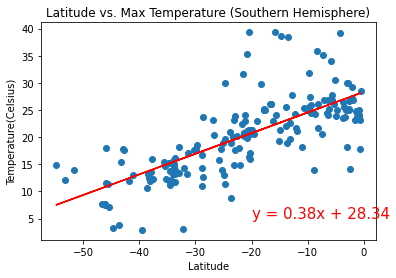

In [39]:
x = southern_df['Lat']
y = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values, 'r-')
plt.annotate(line_eq,(-20,5),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature(Celsius)')
plt.title('Latitude vs. Max Temperature (Southern Hemisphere)')
print(f'The r-squared is: {rvalue**2}')
plt.savefig('southernTemp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03056195304773196


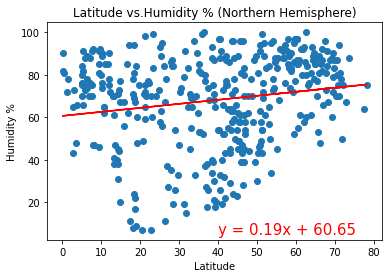

In [46]:
x = northern_df['Lat']
y = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values, 'r-')
plt.annotate(line_eq,(40,5),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Latitude vs.Humidity % (Northern Hemisphere)')
print(f'The r-squared is: {rvalue**2}')
plt.savefig('northernhumid.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00011844882691152351


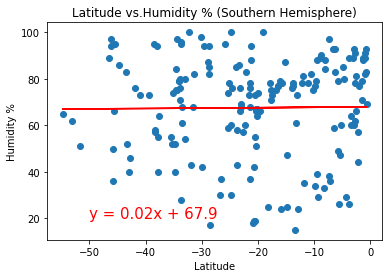

In [43]:
x = southern_df['Lat']
y = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values, 'r-')
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Latitude vs.Humidity % (Southern Hemisphere)')
print(f'The r-squared is: {rvalue**2}')
plt.savefig('southernhumid.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003231575346093747


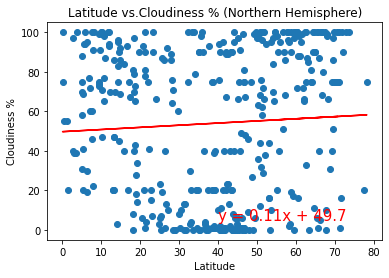

In [45]:
x = northern_df['Lat']
y = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values, 'r-')
plt.annotate(line_eq,(40,5),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Latitude vs.Cloudiness % (Northern Hemisphere)')
print(f'The r-squared is: {rvalue**2}')
plt.savefig('northernclouds.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.014311351233937942


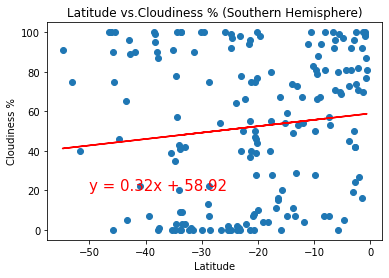

In [49]:
x = southern_df['Lat']
y = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values, 'r-')
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Latitude vs.Cloudiness % (Southern Hemisphere)')
print(f'The r-squared is: {rvalue**2}')
plt.savefig('southernclouds.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 8.959744335454951e-08


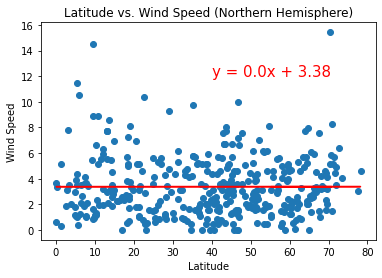

In [52]:
x = northern_df['Lat']
y = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values, 'r-')
plt.annotate(line_eq,(40,12),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed (Northern Hemisphere)')
print(f'The r-squared is: {rvalue**2}')
plt.savefig('northernwind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03730517116652658


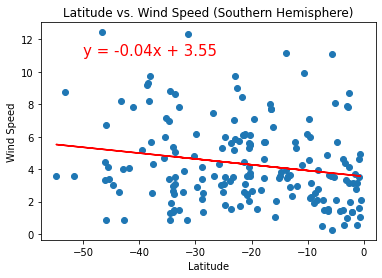

In [54]:
x = southern_df['Lat']
y = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values, 'r-')
plt.annotate(line_eq,(-50,11),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed (Southern Hemisphere)')
print(f'The r-squared is: {rvalue**2}')
plt.savefig('southernwind.png')
plt.show()